In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = clinical_data_complete.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame
mean_tumor_volume

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Flatten column headings and index
mean_tumor_volume = mean_tumor_volume.reset_index()
mean_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = clinical_data_complete.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(sem_tumor_volume)
# Preview DataFrame
sem_tumor_volume.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames. In this case using pivot to make rows into columns
mean_tumor_volume = mean_tumor_volume.reset_index()
pivot_mean_tumor_volume = mean_tumor_volume.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

sem_tumor_volume = sem_tumor_volume.reset_index()
pivot_sem_tumor_volume = sem_tumor_volume.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_mean_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
pivot_sem_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


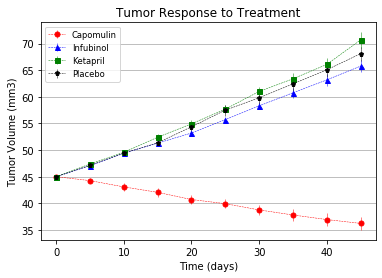

In [7]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_mean_tumor_volume.index, pivot_mean_tumor_volume["Capomulin"], yerr=pivot_sem_tumor_volume["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_tumor_volume.index, pivot_mean_tumor_volume["Infubinol"], yerr=pivot_sem_tumor_volume["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_tumor_volume.index, pivot_mean_tumor_volume["Ketapril"], yerr=pivot_sem_tumor_volume["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_tumor_volume.index, pivot_mean_tumor_volume["Placebo"], yerr=pivot_sem_tumor_volume["Placebo"], color="k", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/fig1.png")

# Show the figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_met_sites = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_sites = pd.DataFrame(mean_met_sites)

# Preview DataFrame
mean_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_met_sites = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met_sites = pd.DataFrame(sem_met_sites)

# Preview DataFrame
sem_met_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites = mean_met_sites.reset_index()
pivot_mean_met_sites = mean_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

sem_met_sites = sem_met_sites.reset_index()
pivot_sem_met_sites = sem_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
# pivot_mean_met_sites.head()
pivot_sem_met_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


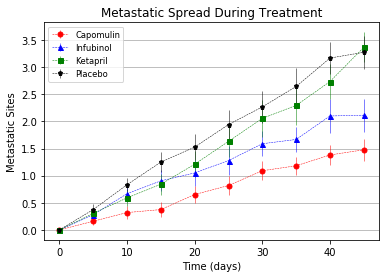

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_mean_met_sites.index, pivot_mean_met_sites["Capomulin"], yerr=pivot_sem_met_sites["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_met_sites.index, pivot_mean_met_sites["Infubinol"], yerr=pivot_sem_met_sites["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_met_sites.index, pivot_mean_met_sites["Ketapril"], yerr=pivot_sem_met_sites["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean_met_sites.index, pivot_mean_met_sites["Placebo"], yerr=pivot_sem_met_sites["Placebo"], color="k", marker="p", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/fig2.png")

# Show the figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
count_mice = pd.DataFrame({"Mouse Count": count_mice})

# Preview DataFrame
count_mice.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
count_mice = count_mice.reset_index()
pivot_count_mice = count_mice.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
pivot_count_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


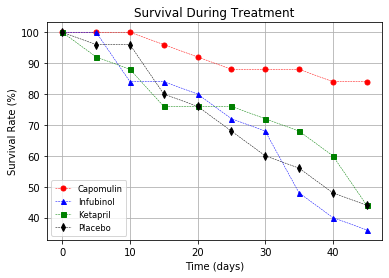

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(100*pivot_count_mice["Capomulin"]/25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100*pivot_count_mice["Infubinol"]/25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100*pivot_count_mice["Ketapril"]/25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100*pivot_count_mice["Placebo"]/25, "kd", linestyle="dashed", markersize=5, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
pct_change_tumor = 100*(pivot_mean_tumor_volume.iloc[-1]-pivot_mean_tumor_volume.iloc[0])/pivot_mean_tumor_volume.iloc[0]
pct_change_sem_tumor = 100*(pivot_sem_tumor_volume.iloc[-1]-pivot_sem_tumor_volume.iloc[0])/pivot_sem_tumor_volume.iloc[0]

# Display the data to confirm
pct_change_tumor

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

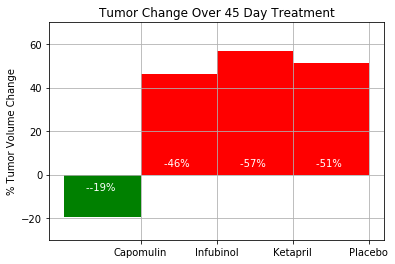

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (pct_change_tumor["Capomulin"], pct_change_tumor["Infubinol"], pct_change_tumor["Ketapril"], pct_change_tumor["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc.
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(ind+0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%% ' % int(height),
               ha='center', va='bottom', color="white")

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               '-%d%% ' % int(height),
               ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/fig4.png")

# Show the Figure
fig.show()